In [1]:
import pandas as pd

In [2]:
df_classes = pd.read_csv('elliptic_txs_classes.csv')
df_edges = pd.read_csv('elliptic_txs_edgelist.csv')
df_features = pd.read_csv('elliptic_txs_features.csv', header=None)

In [3]:
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}

colNames = dict(colNames1, **colNames2, **colNames3 )
colNames = {int(jj): item_kk for jj,item_kk in colNames.items()}

In [4]:
df_features = df_features.rename(columns=colNames)
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3
df_features.head()

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [5]:
df_class_feature = pd.merge(df_classes, df_features )
df_class_feature.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,230425980,3,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,3,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,3,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,3,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [7]:
selected_ids = df_class_feature.loc[(df_class_feature['class'] != 3), 'txId']
df_edges_selected = df_edges.loc[df_edges['txId1'].isin(selected_ids)]
df_classes_selected = df_classes.loc[df_classes['txId'].isin(selected_ids)]
df_features_selected = df_features.loc[df_features['txId'].isin(selected_ids)]

# Merge Class and features
df_class_feature_selected = pd.merge(df_classes_selected, df_features_selected )
df_class_feature_selected.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
1,232029206,2,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
2,232344069,2,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,27553029,2,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
4,3881097,2,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984


In [8]:
X = df_class_feature_selected.drop(columns=['txId', 'class', 'Time step']) # drop class, text id and time step
y = df_class_feature_selected[['class']]

# in this case, class 2 corresponds to licit transactions, we chang this to 0 as our interest is the ilicit transactions
y = y['class'].apply(lambda x: 0 if x == '2' else 1 )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [9]:
X.head()

,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,Local_feature_10,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,0.020069,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
2,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,...,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
4,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,-0.047227,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984


In [10]:
model_RF = RandomForestClassifier().fit(X_train.values,y_train.values)
y_preds = model_RF.predict(X_test.values)

prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds)

print("Random Forest Classifier")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))

Random Forest Classifier
Precision:0.998 
Recall:0.884 
F1 Score:0.937


In [11]:
print(classification_report(y_test.values, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10523
           1       1.00      0.88      0.94      1118

    accuracy                           0.99     11641
   macro avg       0.99      0.94      0.97     11641
weighted avg       0.99      0.99      0.99     11641



In [12]:
importance = model_RF.feature_importances_
importance.shape

(165,)

In [13]:
importance

array([4.52093325e-03, 1.17995393e-02, 2.75656427e-03, 8.62381154e-03,
       2.95874303e-02, 4.20754176e-03, 3.59627789e-05, 4.88413718e-03,
       2.67361244e-03, 5.23066762e-03, 4.85802465e-03, 7.33927666e-04,
       8.55241431e-04, 4.53560896e-02, 0.00000000e+00, 4.32914184e-03,
       3.66138264e-03, 3.16681098e-02, 3.86816989e-03, 3.41530447e-03,
       1.14834069e-03, 4.66790528e-03, 1.03820742e-02, 2.53641141e-03,
       1.14189593e-02, 1.07672705e-03, 8.10029464e-04, 8.11800519e-03,
       7.30404050e-03, 3.86435710e-03, 1.23924414e-02, 7.89806198e-04,
       7.55187287e-04, 1.71696302e-04, 2.12430373e-04, 1.85358007e-04,
       2.86917496e-04, 8.40995166e-05, 8.73788681e-05, 1.26898043e-02,
       2.44455897e-02, 1.32743708e-03, 2.32439099e-02, 5.89241798e-04,
       5.29335780e-04, 4.59561250e-03, 3.44336381e-02, 4.05914473e-03,
       2.19912331e-02, 6.51110793e-04, 6.04460065e-04, 2.21339432e-02,
       4.29333366e-02, 5.61967709e-03, 4.79704406e-02, 9.01537653e-04,
      

<BarContainer object of 165 artists>

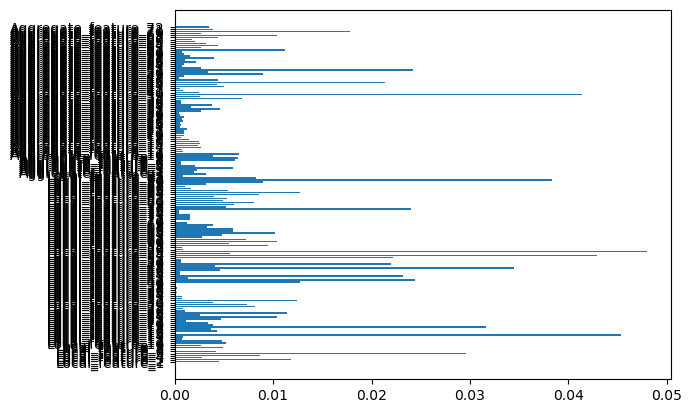

In [14]:
from matplotlib import pyplot as plt
plt.barh(X.columns, importance)

In [15]:
importance_df = pd.DataFrame(columns=X.columns)
importance_df.loc[0] = importance
importance_df.head()

,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,Local_feature_10,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,0.004521,0.0118,0.002757,0.008624,0.029587,0.004208,0.000036,0.004884,0.002674,0.005231,...,0.004446,0.003181,0.002096,0.00177,0.004439,0.010357,0.002655,0.017793,0.003861,0.003477


In [16]:
importance_df.columns[importance_df.gt(importance_df < 0.002).any()].shape

(100,)

In [17]:
new_df = df_class_feature_selected.drop(columns=importance_df.columns[importance_df.gt(importance_df > 0.002).any()])
new_df.shape

(46564, 104)

In [18]:
new_df.head()

,txId,class,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_8,...,Aggregate_feature_62,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,232438397,2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,-0.163645,...,-0.617907,-0.577099,-0.613614,0.241128,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
1,232029206,2,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,-0.163645,...,-0.617907,-0.577099,-0.613614,0.241128,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
2,232344069,2,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.137933,...,-0.617907,-0.577099,-0.613614,0.241128,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,27553029,2,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.141519,...,-0.587217,-0.539735,-0.582077,-0.979074,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
4,3881097,2,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,-0.163640,...,-0.611769,-0.577099,-0.600999,0.241128,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984


In [19]:
X_ = new_df.drop(columns=['txId', 'class', 'Time step']) # drop class, text id and time step
y_ = new_df[['class']]

# in this case, class 2 corresponds to licit transactions, we chang this to 0 as our interest is the ilicit transactions
y_ = y_['class'].apply(lambda x: 0 if x == '2' else 1 )
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.25,random_state=15)

In [20]:
model_RF = RandomForestClassifier().fit(X_train_.values,y_train_.values)
y_preds_ = model_RF.predict(X_test_.values)

prec,rec,f1,num = precision_recall_fscore_support(y_test_.values, y_preds_)

print("Random Forest Classifier")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))
print(classification_report(y_test_.values, y_preds_))

Random Forest Classifier
Precision:0.996 
Recall:0.891 
F1 Score:0.941


In [21]:
print(classification_report(y_test_.values, y_preds_))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10523
           1       1.00      0.89      0.94      1118

    accuracy                           0.99     11641
   macro avg       0.99      0.95      0.97     11641
weighted avg       0.99      0.99      0.99     11641



In [22]:
new_df = df_class_feature_selected.drop(columns=importance_df.columns[importance_df.gt(importance_df > 0.02).any()])
new_df.shape

(46564, 19)

In [23]:
X_ = new_df.drop(columns=['txId', 'class', 'Time step']) # drop class, text id and time step
y_ = new_df[['class']]

# in this case, class 2 corresponds to licit transactions, we chang this to 0 as our interest is the ilicit transactions
y_ = y_['class'].apply(lambda x: 0 if x == '2' else 1 )
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.25,random_state=15)

In [24]:
model_RF = RandomForestClassifier().fit(X_train_.values,y_train_.values)
y_preds_ = model_RF.predict(X_test_.values)

prec,rec,f1,num = precision_recall_fscore_support(y_test_.values, y_preds_)

print("Random Forest Classifier")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))
print(classification_report(y_test_.values, y_preds_))

Random Forest Classifier
Precision:0.975 
Recall:0.802 
F1 Score:0.880
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10523
           1       0.97      0.80      0.88      1118

    accuracy                           0.98     11641
   macro avg       0.98      0.90      0.93     11641
weighted avg       0.98      0.98      0.98     11641



In [25]:
new_df = df_class_feature_selected.drop(columns=importance_df.columns[importance_df.gt(importance_df > 0.2).any()])
new_df.shape

(46564, 4)

In [26]:
X_ = new_df.drop(columns=['txId', 'class', 'Time step']) # drop class, text id and time step
y_ = new_df[['class']]

# in this case, class 2 corresponds to licit transactions, we chang this to 0 as our interest is the ilicit transactions
y_ = y_['class'].apply(lambda x: 0 if x == '2' else 1 )
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.25,random_state=15)

model_RF = RandomForestClassifier().fit(X_train_.values,y_train_.values)
y_preds_ = model_RF.predict(X_test_.values)

prec,rec,f1,num = precision_recall_fscore_support(y_test_.values, y_preds_)

print("Random Forest Classifier")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))
print(classification_report(y_test_.values, y_preds_))

Random Forest Classifier
Precision:0.000 
Recall:0.000 
F1 Score:0.000
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     10523
           1       0.00      0.00      0.00      1118

    accuracy                           0.90     11641
   macro avg       0.45      0.50      0.47     11641
weighted avg       0.82      0.90      0.86     11641



c:\Users\korey\anaconda3\envs\pyfraud\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\korey\anaconda3\envs\pyfraud\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\korey\anaconda3\envs\pyfraud\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\korey\a

In [32]:
new_df = df_class_feature_selected.drop(columns=importance_df.columns[importance_df.gt(importance_df > 0.03).any()])
new_df.shape

(46564, 11)

In [33]:
X_ = new_df.drop(columns=['txId', 'class', 'Time step']) # drop class, text id and time step
y_ = new_df[['class']]

# in this case, class 2 corresponds to licit transactions, we chang this to 0 as our interest is the ilicit transactions
y_ = y_['class'].apply(lambda x: 0 if x == '2' else 1 )
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.25,random_state=15)

model_RF = RandomForestClassifier().fit(X_train_.values,y_train_.values)
y_preds_ = model_RF.predict(X_test_.values)

prec,rec,f1,num = precision_recall_fscore_support(y_test_.values, y_preds_)

print("Random Forest Classifier")
print("Precision:%.3f \nRecall:%.3f \nF1 Score:%.3f"%(prec[1],rec[1],f1[1]))
print(classification_report(y_test_.values, y_preds_))

Random Forest Classifier
Precision:0.965 
Recall:0.784 
F1 Score:0.865
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10523
           1       0.96      0.78      0.86      1118

    accuracy                           0.98     11641
   macro avg       0.97      0.89      0.93     11641
weighted avg       0.98      0.98      0.98     11641



In [34]:
model_RF.feature_importances_

array([9.70843959e-02, 7.09746565e-06, 1.22556082e-01, 1.39128451e-01,
       1.78425865e-01, 2.17276532e-01, 1.38349043e-01, 1.07172534e-01])